In [13]:
import numpy as np
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pickle_file = 'Ising_data.pickle'

try:
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
    
    print(f"Successfully loaded data from {pickle_file}")
       
    temps_list = sorted(data.keys())
    print(f"Found {len(temps_list)} temperatures")
    print(f"Temperature range: {min(temps_list):.3f} to {max(temps_list):.3f}")
    Tc = 2.269
       
    X = []
    y = []
    temps = []
    
    for T in temps_list:
        df = data[T]
        
        if T < Tc:
            label = 0  # Ordered phase
            phase = "ordered"
        else:
            label = 1  # Disordered phase
            phase = "disordered"
        
        configs_array = df.values
        
        
        for config in configs_array:
            X.append(config)
            y.append(label)
            temps.append(T)
        
        print(f"  T = {T:.3f} ({phase}): {len(configs_array)} configurations")
    
    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    temps = np.array(temps)
    
    print(f"\nData loaded successfully!")
    print(f"  Configurations (X): {X.shape}")
    print(f"  Labels (y): {y.shape}")
    print(f"  Temperatures: {temps.shape}")
    
except FileNotFoundError:
    print(f"ERROR: {pickle_file} not found in current directory")
    raise
except Exception as e:
    print(f"ERROR loading pickle file: {e}")
    import traceback
    traceback.print_exc()
    raise


Successfully loaded data from Ising_data.pickle
Found 18 temperatures
Temperature range: 1.304 to 3.252
  T = 1.304 (ordered): 2000 configurations
  T = 1.418 (ordered): 2000 configurations
  T = 1.533 (ordered): 2000 configurations
  T = 1.648 (ordered): 2000 configurations
  T = 1.762 (ordered): 2000 configurations
  T = 1.877 (ordered): 2000 configurations
  T = 1.991 (ordered): 2000 configurations
  T = 2.106 (ordered): 2000 configurations
  T = 2.221 (ordered): 2000 configurations
  T = 2.335 (disordered): 2000 configurations
  T = 2.450 (disordered): 2000 configurations
  T = 2.565 (disordered): 2000 configurations
  T = 2.679 (disordered): 2000 configurations
  T = 2.794 (disordered): 2000 configurations
  T = 2.908 (disordered): 2000 configurations
  T = 3.023 (disordered): 2000 configurations
  T = 3.138 (disordered): 2000 configurations
  T = 3.252 (disordered): 2000 configurations

Data loaded successfully!
  Configurations (X): (36000, 64)
  Labels (y): (36000,)
  Temperatu

In [ ]:
# Data Analysis
print(f"Dataset shape: {X.shape}")
print(f"Feature dimension: {X.shape[1]} (from {int(np.sqrt(X.shape[1]))}x{int(np.sqrt(X.shape[1]))} lattice)")
print(f"\nClass distribution:")
print(f"  Ordered (T < Tc):     {np.sum(y == 0)} samples ({100*np.sum(y == 0)/len(y):.1f}%)")
print(f"  Disordered (T > Tc):  {np.sum(y == 1)} samples ({100*np.sum(y == 1)/len(y):.1f}%)")

# temperature distribution
unique_temps = np.unique(temps)
print(f"\nTemperature range: {unique_temps.min():.3f} to {unique_temps.max():.3f}")
print(f"Number of unique temperatures: {len(unique_temps)}")


Dataset shape: (36000, 64)
Feature dimension: 64 (from 8x8 lattice)

Class distribution:
  Ordered (T < Tc):     18000 samples (50.0%)
  Disordered (T > Tc):  18000 samples (50.0%)

Temperature range: 1.304 to 3.252
Number of unique temperatures: 18


In [15]:
# Shuffle the dataset
np.random.seed(42)
shuffle_idx = np.random.permutation(len(X))
X_shuffled = X[shuffle_idx]
y_shuffled = y[shuffle_idx]
temps_shuffled = temps[shuffle_idx]

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test, temps_train, temps_test = train_test_split(
    X_shuffled, y_shuffled, temps_shuffled, 
    test_size=0.2, 
    random_state=42,
    stratify=y_shuffled  
)

print(f"Training set: {X_train.shape[0]} samples ({100*len(X_train)/len(X):.0f}%)")
print(f"  Ordered:     {np.sum(y_train == 0)} samples")
print(f"  Disordered:  {np.sum(y_train == 1)} samples")
print(f"\nTest set: {X_test.shape[0]} samples ({100*len(X_test)/len(X):.0f}%)")
print(f"  Ordered:     {np.sum(y_test == 0)} samples")
print(f"  Disordered:  {np.sum(y_test == 1)} samples")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set: 28800 samples (80%)
  Ordered:     14400 samples
  Disordered:  14400 samples

Test set: 7200 samples (20%)
  Ordered:     3600 samples
  Disordered:  3600 samples



VISUALIZATION

Lattice size: 8 x 8



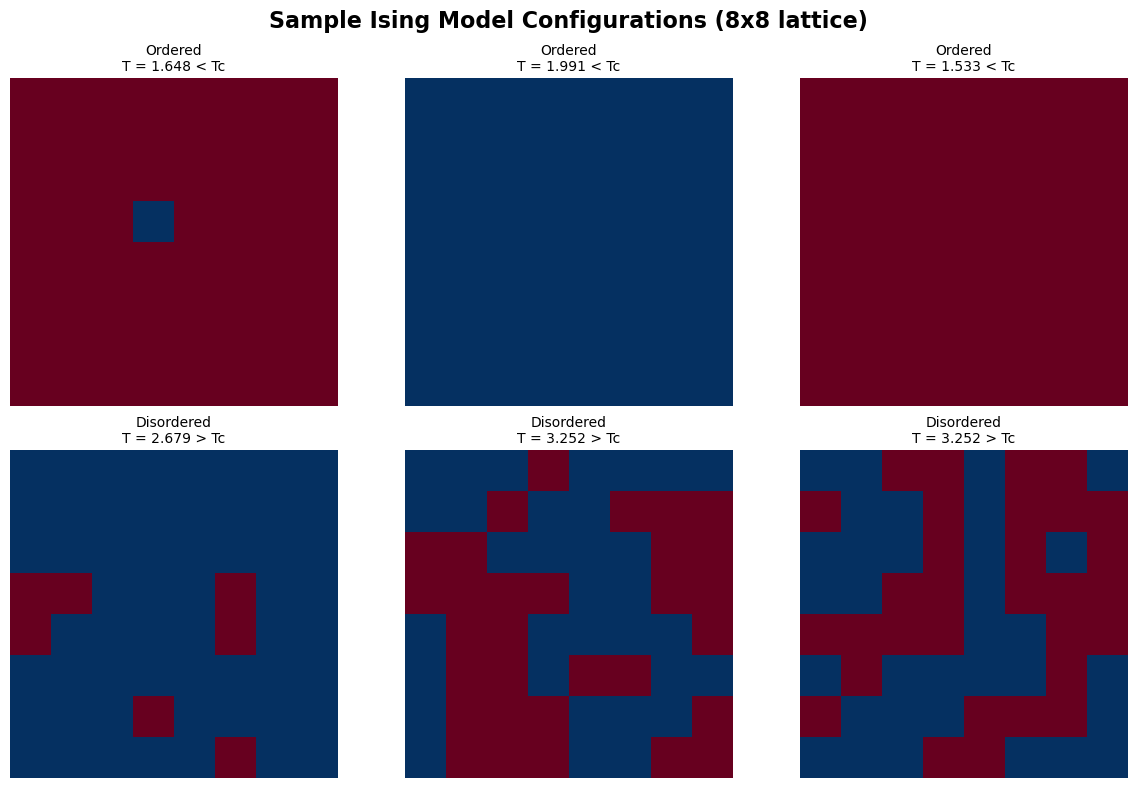

 Blue = spin -1, Red = spin +1


In [16]:
# Visualize 
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("VISUALIZATION")
print("="*60 + "\n")

# Determine lattice size from data
L = int(np.sqrt(X.shape[1]))
print(f"Lattice size: {L} x {L}\n")

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f'Sample Ising Model Configurations ({L}x{L} lattice)', 
             fontsize=16, fontweight='bold')

# 3 ordered and 3 disordered configurations
ordered_indices = np.where(y_train == 0)[0][:3]
disordered_indices = np.where(y_train == 1)[0][:3]

for i, idx in enumerate(ordered_indices):
    config = X_train[idx].reshape(L, L)
    temp = temps_train[idx]
    axes[0, i].imshow(config, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[0, i].set_title(f'Ordered\nT = {temp:.3f} < Tc', fontsize=10)
    axes[0, i].axis('off')

for i, idx in enumerate(disordered_indices):
    config = X_train[idx].reshape(L, L)
    temp = temps_train[idx]
    axes[1, i].imshow(config, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[1, i].set_title(f'Disordered\nT = {temp:.3f} > Tc', fontsize=10)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

print(" Blue = spin -1, Red = spin +1")

Training Logistic Regression classifier...
Training complete!

TRAINING SET PERFORMANCE:
  Accuracy:  0.5168
  Precision: 0.5169
  Recall:    0.5136
  F1-Score:  0.5152

TEST SET PERFORMANCE:
  Accuracy:  0.5119
  Precision: 0.5125
  Recall:    0.4897
  F1-Score:  0.5009

                Predicted
              Ordered  Disordered
Actual Ordered    1923      1677
       Disordered 1837      1763


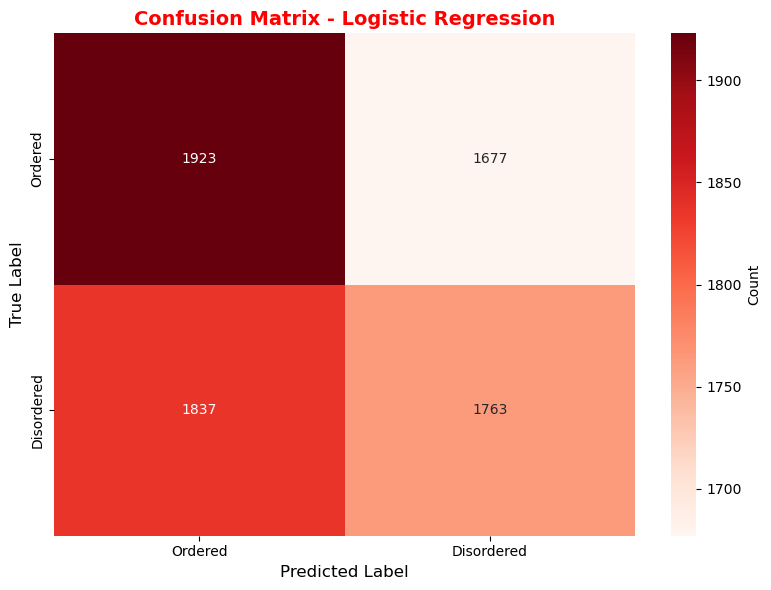


SUMMARY: Test Accuracy = 51.19%


In [18]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Train Logistic Regression with default parameters
print("Training Logistic Regression classifier...")
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)
print("Training complete!\n")
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Calculate metrics for training set (to check for overfitting)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

# Display results
print("TRAINING SET PERFORMANCE:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  F1-Score:  {train_f1:.4f}")

print("\nTEST SET PERFORMANCE:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")


# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_test)
print(f"\n                Predicted")
print(f"              Ordered  Disordered")
print(f"Actual Ordered    {cm[0,0]:3d}      {cm[0,1]:3d}")
print(f"       Disordered {cm[1,0]:3d}      {cm[1,1]:3d}")

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Ordered', 'Disordered'],
            yticklabels=['Ordered', 'Disordered'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', 
          fontsize=14, fontweight='bold', color='red')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print(f"SUMMARY: Test Accuracy = {test_accuracy:.2%}")
print("="*60)
